In [8]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# import all of the required libraries 

import numpy as np
import matplotlib.pyplot as plt
import math
import plotly as pl
import plotly.graph_objects as go
import seaborn
import pandas as pd
from scipy.fft import fft, fftfreq, ifft

# the following code will allow to access the local_path to the working file director where all of the result files are saved
import os
local_path = os.getcwd()


The fundamental frequency within the range 1 Hz to 60 Hz is 6.506506506506507 Hz


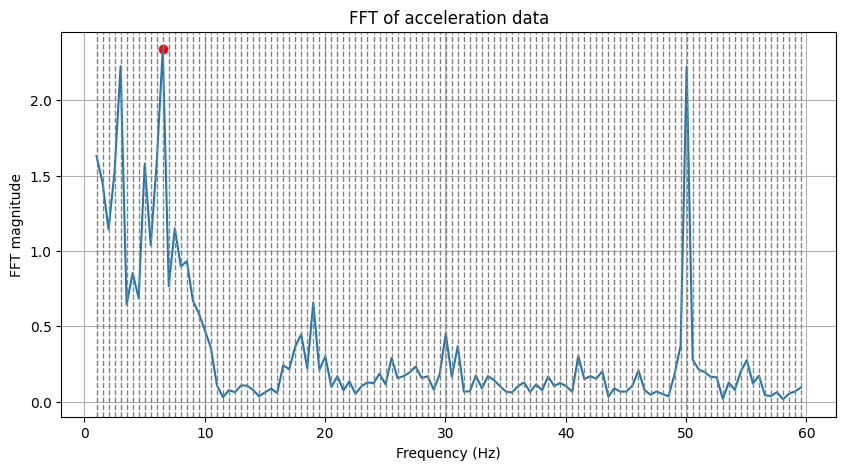

In [18]:
current_file = "Bank_B_NO_75_Channel_1"
# Define the minimum and maximum frequency for the FFT visualization
f_min = 1  # Replace with your desired minimum frequency
f_max = 60  # Replace with your desired maximum frequency

# Number of rows to read from the CSV file
n_rows = 1000  # Replace with your desired number of rows

# Load the CSV file using pandas
data = pd.read_csv(f'{local_path}\\{current_file}.csv', nrows=n_rows)

# Assuming the first column is 'time' and second column is 'acceleration'
t = data.iloc[:, 0].values  # time (converted to numpy array)
acceleration = data.iloc[:, 1].values  # acceleration (converted to numpy array)

# Compute the time step (assuming the time is uniformly sampled)
dt = t[1] - t[0]

# Compute the FFT of the acceleration data
acceleration_fft = fft(acceleration)

# Compute the absolute values (magnitudes) of the FFT
acceleration_fft_magnitude = np.abs(acceleration_fft)

# Compute the frequency bins
n = len(t)
freq = fftfreq(n, dt)

# Get the indices of the frequencies between f_min and f_max
indices = np.where((freq >= f_min) & (freq <= f_max))

# Extract the frequency and magnitude values within the defined range
freq_range = freq[indices]
acceleration_fft_magnitude_range = acceleration_fft_magnitude[indices]

# Find the index of the peak of the FFT within the defined frequency range
idx_peak_range = np.argmax(acceleration_fft_magnitude_range)

# Get the fundamental frequency within the defined frequency range
f_fundamental_range = freq_range[idx_peak_range]

print(f"The fundamental frequency within the range {f_min} Hz to {f_max} Hz is {f_fundamental_range} Hz")

# Plot the FFT magnitude vs frequency between f_min and f_max
# ...rest of your code...

# Plot the FFT magnitude vs frequency between f_min and f_max
plt.figure(figsize=(10, 5))
plt.plot(freq_range, acceleration_fft_magnitude_range)

# Draw vertical line at each frequency point
for freq_val in freq_range:
    plt.axvline(x=freq_val, linestyle='--', color='gray', linewidth=0.5)

plt.scatter(freq_range[idx_peak_range], acceleration_fft_magnitude_range[idx_peak_range], color='r')  # highlight the peak
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT magnitude')
plt.title('FFT of acceleration data')
plt.grid()

# Save the figure BEFORE calling plt.show()
plt.savefig(f"{current_file}.png", dpi=300, bbox_inches='tight')

# Now display the figure
plt.show()


In [7]:
1 / f_fundamental_range

0.15369230769230768

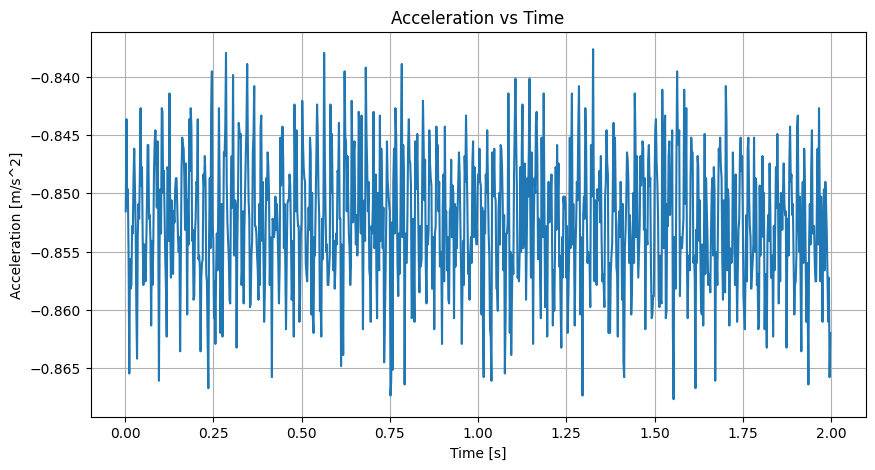

In [101]:
# Define the minimum and maximum time for the plot
t_min = 0  # Replace with your desired minimum time
t_max = 40  # Replace with your desired maximum time

# Load the CSV file using pandas
data = pd.read_csv(f'{local_path}\\{current_file}.csv')

# Assuming the first column is 'time' and second column is 'acceleration'
t = data.iloc[:, 0]  # time
acceleration = data.iloc[:, 1]  # acceleration

# Get the indices of the times between t_min and t_max
indices = (t >= t_min) & (t <= t_max)

# Plot the acceleration vs time between t_min and t_max
plt.figure(figsize=(10, 5))
plt.plot(t[indices], acceleration[indices])
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [m/s^2]')
plt.title('Acceleration vs Time')
plt.grid()
plt.show()


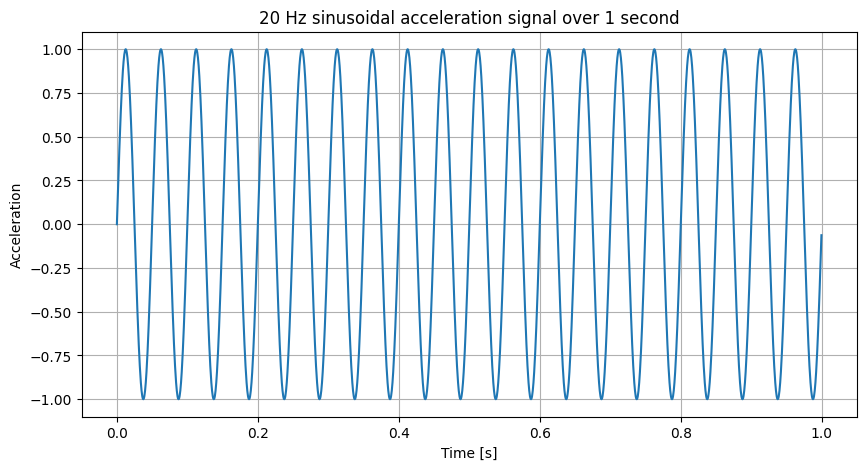

In [84]:
# Given values
f = 20  # Frequency, in cycles per second, or Hertz
f_s = 1000  # Sampling rate, or number of measurements per second

# Generate the time values
t = np.linspace(0, 1, 2*f_s, endpoint=False)

# Generate the signal that represents acceleration at 20Hz
a = np.sin(f * 2 * np.pi * t)

# Plot the signal
plt.figure(figsize=(10, 5))
plt.plot(t, a)
plt.title('Hz sinusoidal acceleration signal over 1 second')
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [m/s^2]')
plt.grid()
plt.show()


In [34]:
fundamental_frequency_list = [f_fundamental, 2 * f_fundamental, 3 * f_fundamental, 4 * f_fundamental]
print(f"The Fundamental Frequency of the data is: {f_fundamental:.2f} Hz, The 2nd Harmonic: {f_fundamental * 2}, The 3d Harmonic: {f_fundamental * 3}, The 4th Harmonic: {4 * f_fundamental}")

The Fundamental Frequency of the data is: 20.06 Hz, The 2nd Harmonic: 40.11111111111111, The 3d Harmonic: 60.16666666666666, The 4th Harmonic: 80.22222222222221


## Input Parameters